In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path='/content/drive/MyDrive/Data Science Projects/Medical Insurance Cost Prediction/insurance.csv'

In [3]:
df = pd.read_csv(path)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

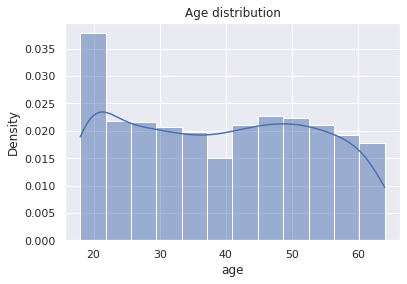

In [6]:
sns.set()
sns.histplot(df['age'], kde=True, stat="density")
plt.title('Age distribution')
plt.show()

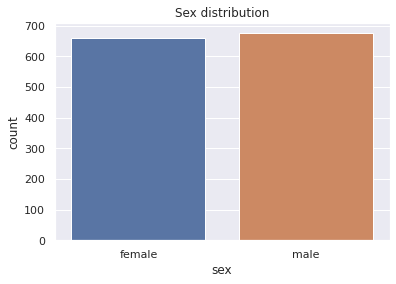

In [7]:
sns.countplot(x='sex', data=df)
plt.title('Sex distribution')
plt.show()

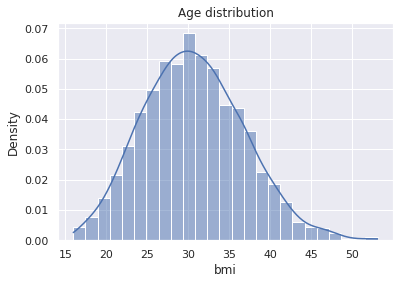

In [8]:
sns.histplot(df['bmi'], kde=True, stat="density")
plt.title('Age distribution')
plt.show()

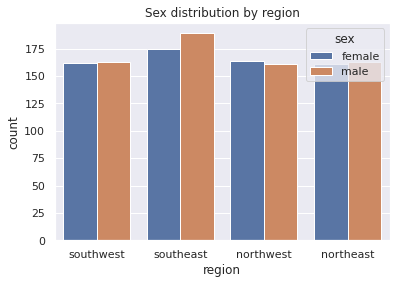

In [9]:
sns.countplot(x='region', hue='sex',data=df)
plt.title('Sex distribution by region')
plt.show()

In [10]:
df.replace({'sex':{'male':0, 'female':1}}, inplace=True)

In [11]:
df.replace({'smoker':{'no':0, 'yes':1}}, inplace=True)

In [12]:
region = np.array(df['region'].unique())
region_dict = {key:index for index,key in enumerate(region,0)}
df['region'] = df['region'].map(region_dict)

In [13]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,2,10600.54830
1334,18,1,31.920,0,0,3,2205.98080
1335,18,1,36.850,0,0,1,1629.83350
1336,21,1,25.800,0,0,0,2007.94500


In [14]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [15]:
X=df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']].copy()
y= df['charges'].copy()

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [88]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

In [89]:
lr_model.fit(X_train.values, y_train.values.ravel())

LinearRegression()

In [90]:
predict = lr_model.predict(X_test.values)

In [91]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predict)
r2

0.7866564115370135

In [92]:
review = np.array([[30, 1, 20, 0, 0, 0]])
predict_review = lr_model.predict(review)
predict_review

array([1723.89333289])

In [93]:
review = np.array([[35, 4, 30, 4, 1, 1]])
predict_review = lr_model.predict(review)
predict_review

array([32980.25083595])